# Capping is also know as Winsorization 

In [1]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt,seaborn as sns

In [42]:
data = pd.read_csv("ds2.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [44]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<AxesSubplot:>

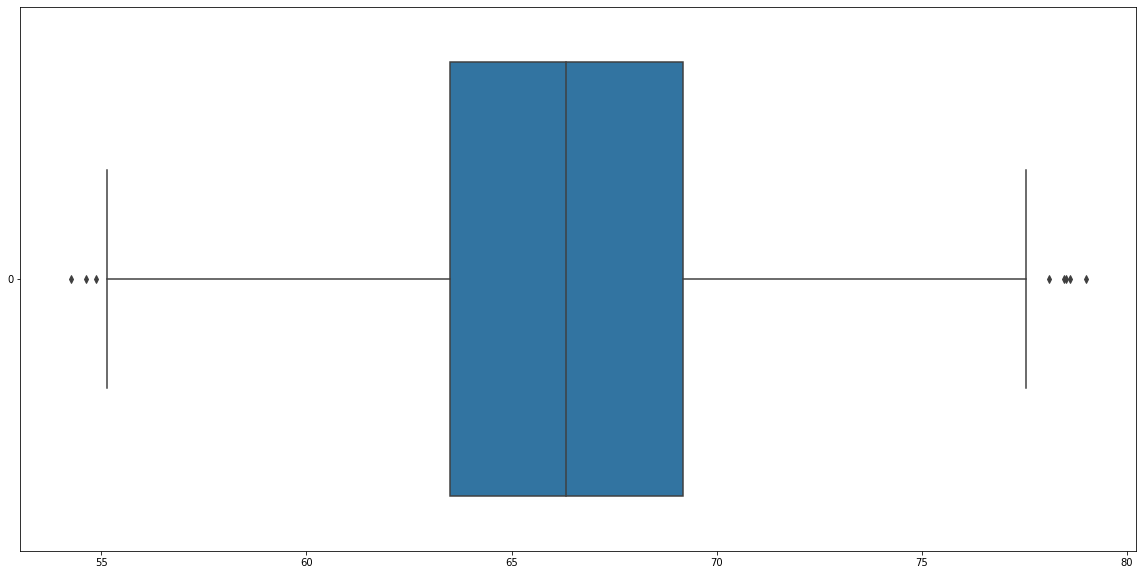

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data.Height,orient="h")

In [46]:
upper = data.Height.quantile(0.99)
upper

74.7857900583366

In [47]:
lower = data.Height.quantile(0.01)
lower

58.134411586716546

## It is important to set boundary to same range 
### e.g upper -1 lower +1

In [48]:
total_outliers = data[(data.Height <= lower) | (data.Height >= upper)]
total_outliers.shape

(200, 3)

In [49]:
total_outliers

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Trimming

In [50]:
new = data[(data.Height >= lower) & (data.Height <= upper)]
new.shape

(9800, 3)

In [51]:
new

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [52]:
def graph(old,new):

    import scipy.stats as stats

    plt.figure(figsize=(20,10))

    plt.subplot(121)
    stats.probplot(old,plot=plt)
    plt.title("Before")

    plt.subplot(122)
    stats.probplot(new,plot=plt)
    plt.title("After")

    # box
    
    plt.figure(figsize=(20,10))

    plt.subplot(121)
    plt.title("Before")
    sns.boxplot(data=old,orient="h",linewidth=3,color="orange")

    plt.subplot(122)
    plt.title("After")
    sns.boxplot(data=new,orient="h",linewidth=3,color="skyblue")
    
    
    plt.figure(figsize=(20,10))

    plt.subplot(121)
    plt.title("Before")
    sns.histplot(data=old,linewidth=3,color="blue",kde=True,edgecolor="black")

    plt.subplot(122)
    plt.title("After")
    sns.histplot(data=new,linewidth=3,color="blue",kde=True,edgecolor="black")
    
    
    plt.figure(figsize=(20,10))

    plt.subplot(121)
    plt.title("Before")
    sns.scatterplot(x = old,y=old)

    plt.subplot(122)
    plt.title("After")
    sns.scatterplot(x = new,y=new)




    plt.show()

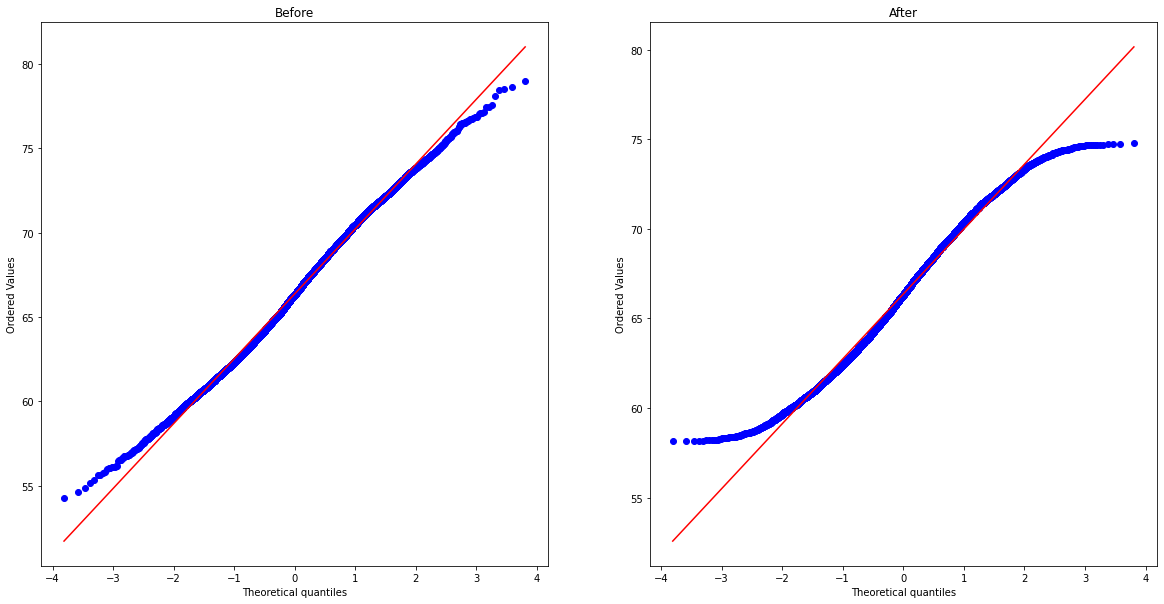

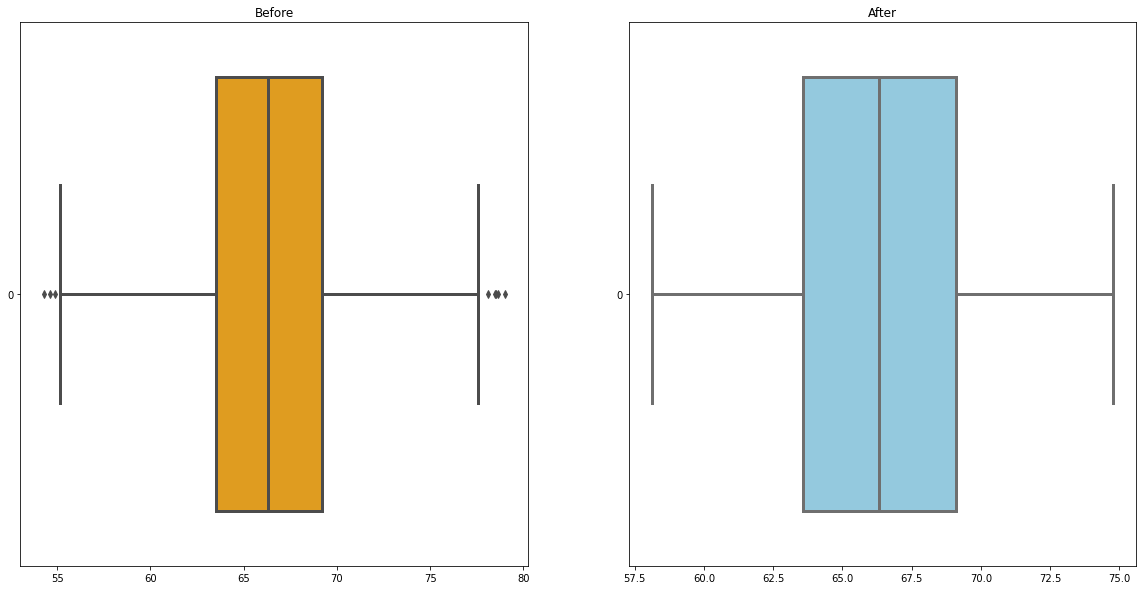

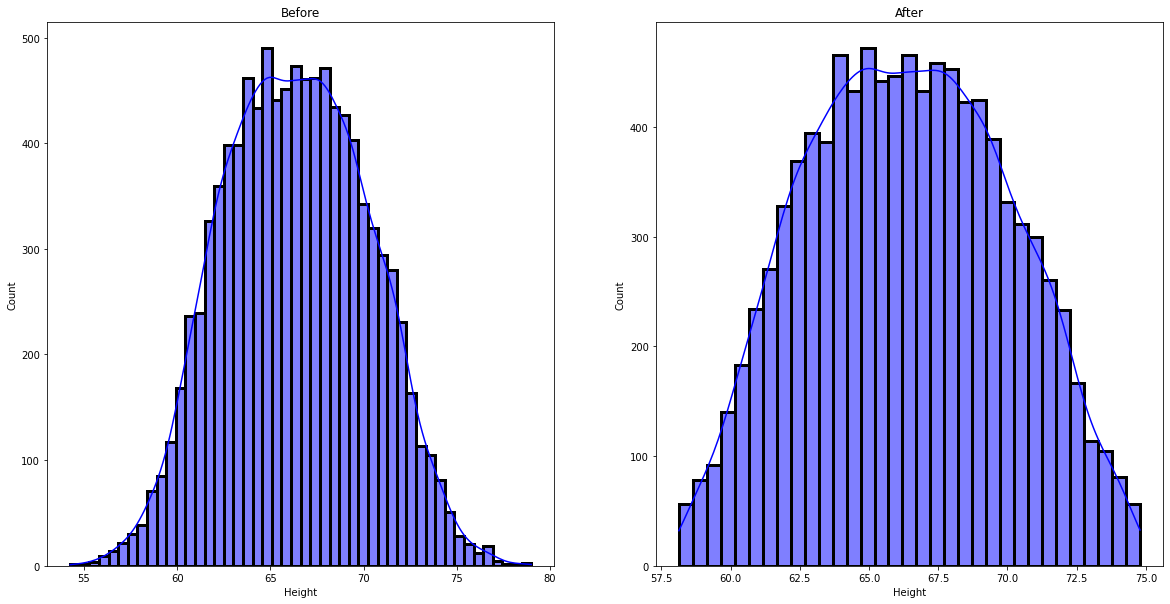

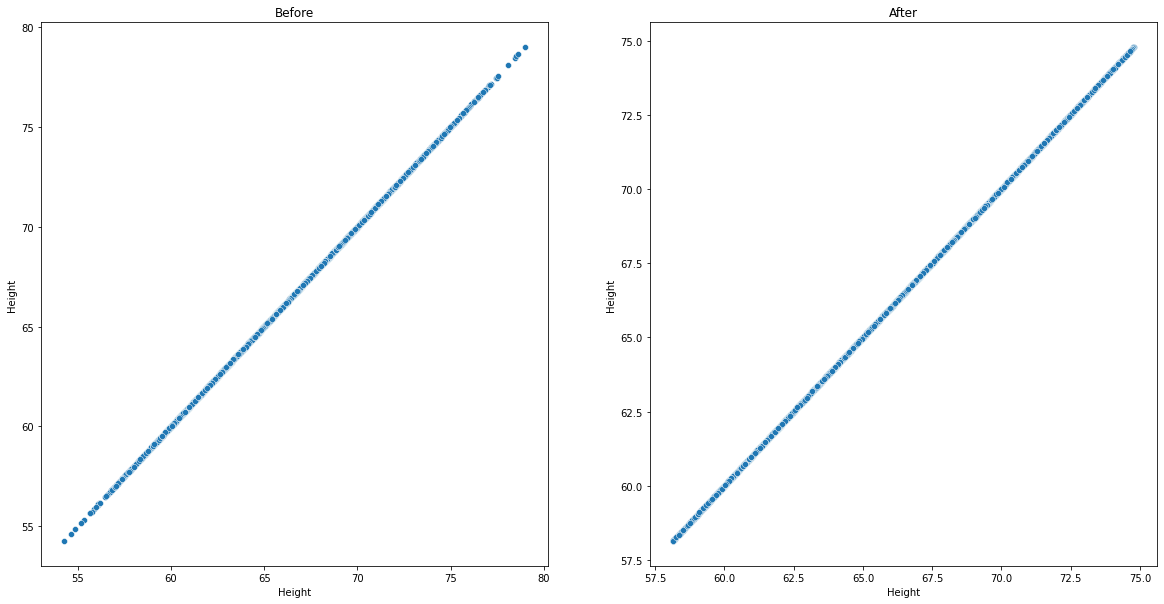

In [53]:
graph(data.Height,new.Height)

# Capping

In [55]:
cap = data.copy()

In [56]:
cap.Height = np.where(
    
    data.Height >= upper,upper,
    
    np.where(
        data.Height <= lower,lower,
        data.Height
    
    )

)

In [59]:
cap.Height.describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

# Compare with Trimming AND Capping

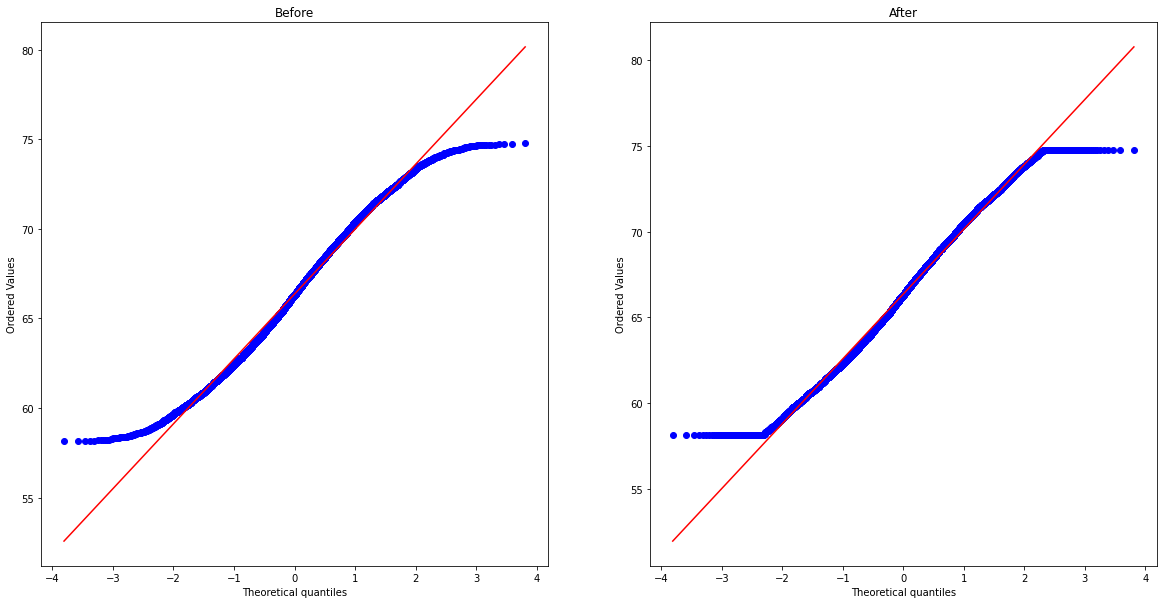

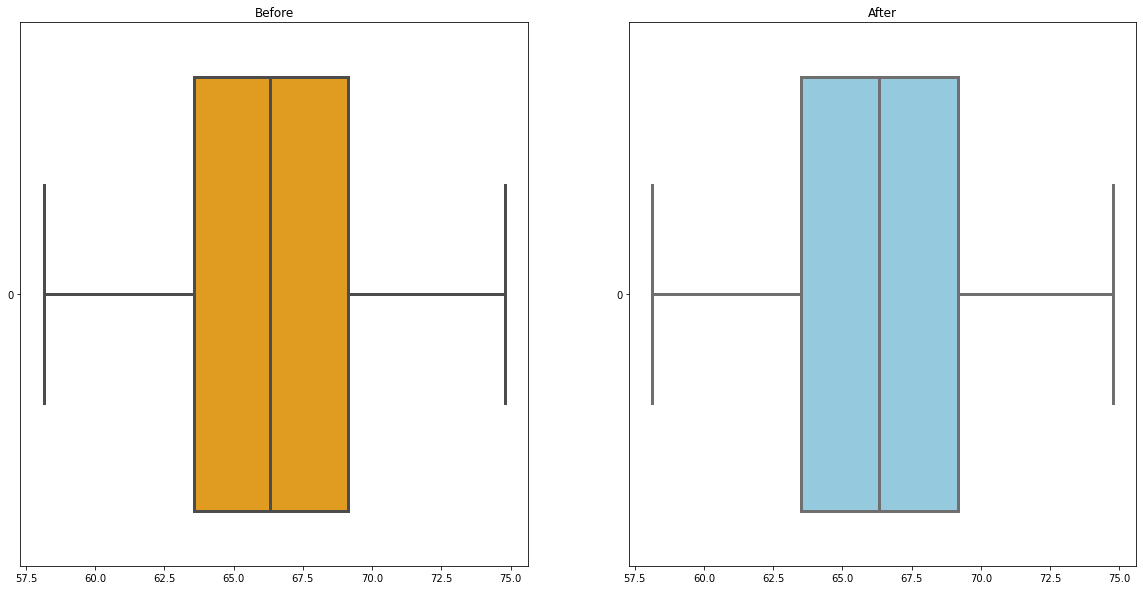

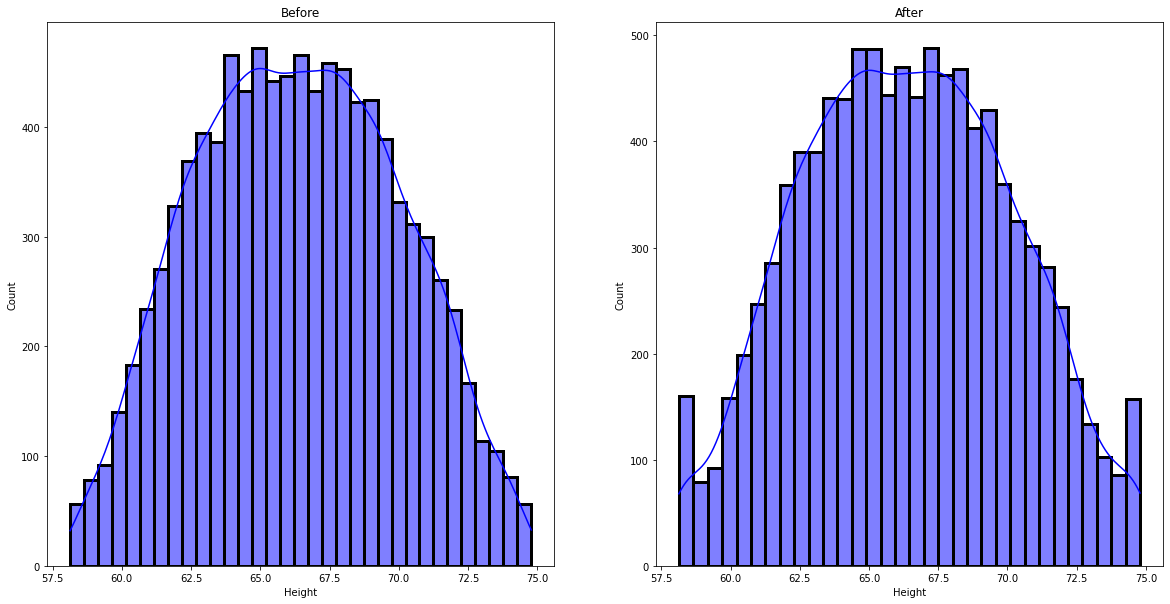

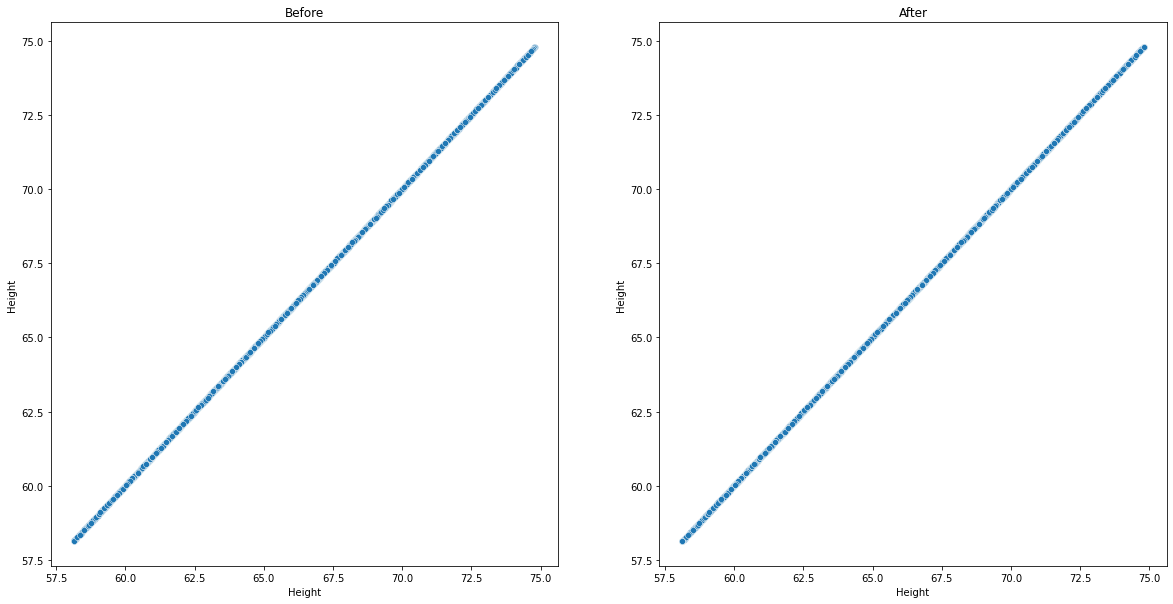

In [60]:
graph(new.Height,cap.Height)